<a href="https://colab.research.google.com/github/arimateia-souza/webscraping/blob/main/Atividade_Webscraping_noticias_eaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Tomando por base os notebooks: [Github-Josenalde-nbSelenium](https://github.com/josenalde/datascience/blob/main/notebooks/nbselenium.ipynb)  
e [Github-Josenalde-Nuvem-de-Palavras](https://github.com/josenalde/datascience/blob/main/notebooks/nb3.ipynb)
- Construir **nuvens de palavras** com o conteúdo de **TODAS as notícias em TODAS as páginas** de resposta ao termo buscado 'eaj' em: [Noticias-EAJ](https://www.ufrn.br/imprensa/noticias/filtros?text=eaj)
- Construir gráfico de barras com número de notícias por ano.

Entrega: link para notebook com arquivo de imagem da nuvem gerada

In [7]:
#Instalação de todas ferramentas
!pip install -U selenium
!apt-get update
!apt-get install -y chromium-browser
!apt install chromium-chromedriver
!pip install beautifulsoup4

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
chromium-browser is already the newest version (1:85.0.4183.83-0ubuntu2.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 17 not up

In [8]:
#Importações e configuração do
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-gpu')
driver = webdriver.Chrome(options=options)
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup
import requests



In [9]:
def find(driver):
    element = driver.find_element(By.TAG_NAME, 'content')
    if element:
        return element
    else:
        return False

In [10]:
url_1 = 'https://www.ufrn.br/imprensa/noticias/filtros?text=eaj'
driver.get(url_1)
time.sleep(5)

element = driver.find_element(By.XPATH, '//*[@id="noticias-paginacao"]/li[last()-1]/a') #-1 pq o sinal > proxima pagina é um <li>

NumPag = int(element.text)
print("Número total de páginas: ", NumPag)

text_to_cloud = ''
dates=[]

Número total de páginas:  28


In [11]:
from selenium.common import exceptions
for j in range(NumPag):
    print('---------------------------------')
    print('Pagina de noticia atual: ', j)
    print('---------------------------------')

    # Obtém lista de notícias (inclui 2 itens que não são notícias)
    title_news = driver.find_elements(By.CLASS_NAME, 'blue-link')
    n_news = len(title_news)  # Quantas notícias na página atual + 2
    print('n_news: ', n_news)  # Valor de fato diminuir 2

    # Guardar todos os links de notícia da página atual
    title_news_hrefs = []
    for i in range(1, n_news):
        title_news_hrefs.append(title_news[i].get_attribute('href'))

    print('--------------------------------------------')
    print('Conjunto de notícias obtidos desta página...')
    print('--------------------------------------------')
    for i in title_news_hrefs:
        print(i)

    print('-----------------------------------------------')
    print('Vou começar a raspagem de dados em cada notícia')
    print('-----------------------------------------------')
    for i in range(1, len(title_news_hrefs)):
        link = title_news_hrefs[i]
        if 'imprensa' in link:
            print(link)
            driver.get(link)
            time.sleep(10)
            news_text = WebDriverWait(driver, 120).until(find)
            # Extrair o ano da data de publicação
            date_element = driver.find_element(By.XPATH, '//*[@id="date_create"]')
            date_text = date_element.text
            # Divida o texto em partes usando os parênteses como separadores
            date_parts = date_text.split('(')
            date_info = date_parts[0]
            year = date_info.split()[-1]  # Pega a última parte do texto, que é o ano
            # Adicione o ano à lista de datas
            dates.append(year)
            print(dates)

            text_to_cloud += news_text.text
            driver.back()
            time.sleep(2)
        if i == len(title_news_hrefs) - 1:  # Se já leu a última notícia da página k, sinalizar para ir para k+1
            print('-------Terminei esta página, vou para a próxima página------')
            try:
              driver.find_element(By.XPATH, '//*[@id="noticias-paginacao"]/li/a[@title="Próxima página"]').click()  # Último elemento é o símbolo > de próxima página
              time.sleep(5)
              mudou = True
            except exceptions.NoSuchElementException:
                driver.refresh()


---------------------------------
Pagina de noticia atual:  0
---------------------------------
n_news:  12
--------------------------------------------
Conjunto de notícias obtidos desta página...
--------------------------------------------
https://www.ufrn.br/#balaoTags
https://www.ufrn.br/imprensa/noticias/75214/estudantes-da-eaj-despescam-300-kg-de-peixes-no-setor-de-aquicultura
https://www.ufrn.br/imprensa/noticias/74955/ufrn-empossa-nova-direcao-da-eaj
https://www.ufrn.br/imprensa/noticias/74685/eaj-semtas-e-mpt-realizam-curso-para-catadores-de-natal
https://www.ufrn.br/imprensa/noticias/74216/divulgados-resultados-de-editais-para-pesquisadores-da-eaj-e-esufrn
https://www.ufrn.br/imprensa/noticias/74077/divulgados-resultados-preliminares-para-pesquisadores-da-eaj-e-esufrn
https://www.ufrn.br/imprensa/noticias/74067/aluna-da-eaj-recebe-medalha-na-olimpiada-brasileira-de-robotica
https://www.ufrn.br/imprensa/noticias/73408/eaj-abre-inscricoes-para-curso-sobre-praticas-de-meditacao

Nuvem de Palavras:

In [12]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS


In [13]:
STOPWORDS = ['ver','principal','essa','vez','nas','mas',
             'qual','principal','ele','ter','doença','pois','este',
             'vez','ver principal','artigo principal','já',
             'aos','pode','outro','artigo','desse',
             'alguns','meio','entre','das','podem','esse',
             'seu','também','são','quando','de', 'que','em',
             'os','as','da','como','dos','ou','se','um','uma',
             'para','na','ao','mais','por','não','ainda','muito','sua',
             'a', 'é', 'o', 'e', 'no', 'do', 'com', 'eu', 'eaj','escola']

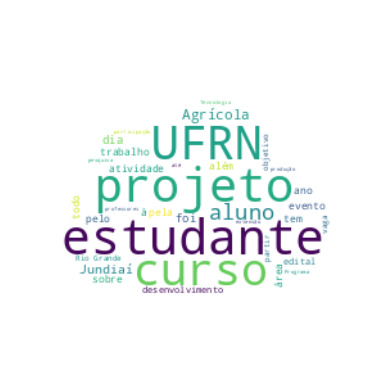

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image

def create_word_cloud(string):
   maskArray = np.array(Image.open("/content/cloud.jpg")) #uso do numpy
   cloud = WordCloud(background_color = "white", max_font_size=50, max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
   cloud.generate(string)
   cloud.to_file("wordCloud.png")
   plt.figure()
   plt.imshow(cloud, interpolation='bilinear')
   plt.axis('off')

create_word_cloud(text_to_cloud)

Construir gráfico de barras com número de notícias por ano:

In [15]:
!pip install matplotlib

dict_keys(['2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016'])
dict_values([28, 78, 39, 32, 31, 20, 31, 14])


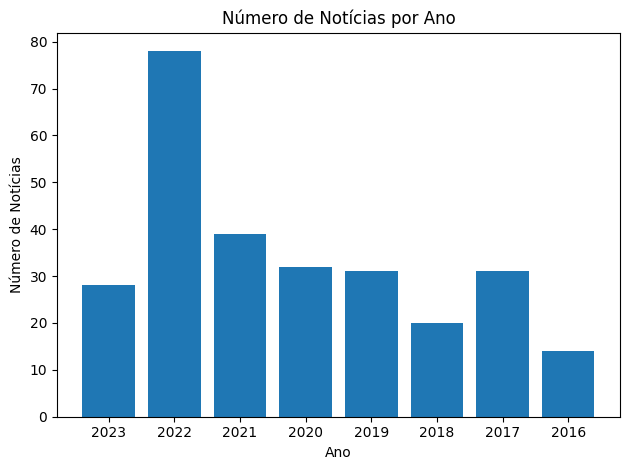

In [16]:
import matplotlib.pyplot as plt

# Contar o número de notícias por ano
news_count = {}
for year in dates:
    news_count[year] = news_count.get(year, 0) + 1

# Separar os anos e as contagens
years = list(news_count.keys())
counts = list(news_count.values())
print(news_count.keys())
print(news_count.values())
# Criar o gráfico de barras
plt.bar(years, counts)
plt.xlabel("Ano")
plt.ylabel("Número de Notícias")
plt.title("Número de Notícias por Ano")
plt.tight_layout()

plt.show()
